# Dairesel Kuyruk
- <b>Dairesel kuyruk</b>, son öğenin ilk öğeye bağlandığı normal bir sıranın genişletilmiş versiyonudur. Böylece daire benzeri bir yapı oluşturur.

- Basit kuyrukta, bir kaç ekleme ve çıkarma işleminden sonra kullanılamayan boş alanlar olacaktır.<b> Dairesel kuyruk</b> bu sorunu çözmeyi amaçlar.

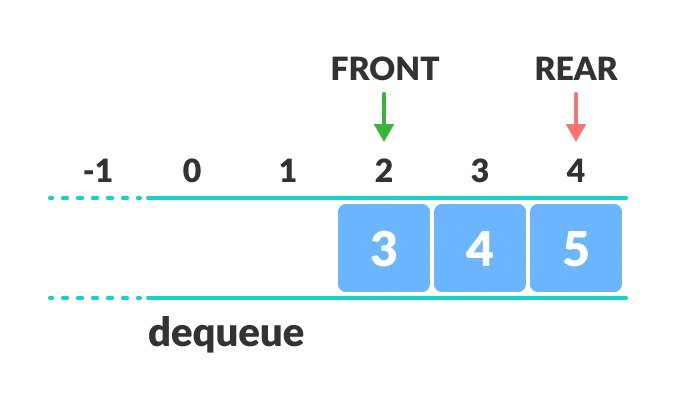

### Burada 0 ve 1 indeksleri yalnızca kuyruk sıfırlandıktan sonra kullanılabilir(tüm öğeler silindikten sonra).

### Dairesel Kuyruğun Çalışma Prensibi:
Dairesel Kuyrukların çalışma prensibini 3 bölüme ayırabiliriz.

<b>A.) Ana Bölüm:</b>
1. FRONT ve REAR diye 2 değişken kullanılır.
2. FRONT ilk öğeyi takip etmeyi sağlar.
3. REAR son öğeyi takip etmeyi sağlar.
4. FRONT ve REAR değişkenleri ilk tanımlanırken -1 olarak tanımlanır. 

<b>B.) Enqueue Bölümü:</b>
1. Kuyruk dolu mu diye kontrol edilir.
2. İlk öğe için FRONT değişkeni 0 olarak ayarlanır.
3. REAR indeksini dairesel olarak 1 arttırılır.(Yani REAR sona ulaşırsa, sonraki sıranın FRONT'u olur.)
4. Yeni öğe REAR ile gösterilen konuma eklenir.

<b>C.) Dequeue Bölümü:</b>
1. Kuyruk boş mu diye kontrol edilir.
2. FRONT ile gösterilen değer döndürülür.
3. FRONT indexi dairesel olarak 1 arttırılır.
4. Son öğe için FRONT ve REAR değişkenlerini -1 olarak sıfırlanılır.

Ancak, tam kuyruk denetiminin yeni bir ek durumu vardır:
- DURUM 1: FRONT = 0 and REAR = SIZE - 1
- DURUM 2: FRONT = REAR + 1

<b>(İkinci durum, dairesel artış nedeniyle REAR, 0'dan başladığında ve değeri FRONT'tan sadece 1 daha az olduğunda, sıra doludur.)</b>

In [18]:
### Pythonda Dairesel Kuyruk İşlemi ###

class CircularQueue():

    def __init__(self, k):  # Adım 1: Kuyruk oluşturmak.
        self.k = k
        self.queue = [None] * k
        self.head = self.tail = -1  # FRONT ve REAR değişkenleri -1 olarak tanımlamak.

    def enqueue(self, item):  # Adım 2: Dairesel kuyruğa öğe eklemek.                    

        if ((self.tail + 1) % self.k == self.head):  # Kuyruğun doluluğu kontrol edilir.
            print("Dairesel kuyruk dolu!\n")

        elif (self.head == -1):
            self.head = 0
            self.tail = 0
            self.queue[self.tail] = item
        else:
            self.tail = (self.tail + 1) % self.k  # 
            self.queue[self.tail] = item

    
    def dequeue(self):  # Adım 3: Dairesel kuyruktan öğe silmek.
        if (self.head == -1):  # Kuyruğun boş olup olmadığı kontrol edilir.
            print("Dairesel kuyruk boş!\n")

        elif (self.head == self.tail):
            temp = self.queue[self.head]
            self.head = -1
            self.tail = -1
            return temp
        else:
            temp = self.queue[self.head]
            self.head = (self.head + 1) % self.k
            return temp

    def printCQueue(self):  # Adım 4: Dairesel kuyruğu ekrana yazdırmak.
        if(self.head == -1):
            print("Dairesel kuyrukta eleman yok!")

        elif (self.tail >= self.head):
            for i in range(self.head, self.tail + 1):
                print(self.queue[i], end=" ")
            print()
        else:
            for i in range(self.head, self.k):
                print(self.queue[i], end=" ")
            for i in range(0, self.tail + 1):
                print(self.queue[i], end=" ")
            print()


cq = CircularQueue(5)
# Ekleme.
cq.enqueue(1)
cq.enqueue(2)
cq.enqueue(3)
cq.enqueue(4)
cq.enqueue(5)
print("İlk Kuyruk: ")
cq.printCQueue()

# Çıkarma.
cq.dequeue()
print("Öğeyi Çıkardıktan Sonra Kuyruk: ")
cq.printCQueue()

İlk Kuyruk: 
1 2 3 4 5 
Öğeyi Çıkardıktan Sonra Kuyruk: 
2 3 4 5 
